In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets


# Load the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = datasets.mnist.load_data()

# Concatenate the training and test sets
X_data = np.concatenate((X_train_full, X_test), axis=0)
y_data = np.concatenate((y_train_full, y_test), axis=0)

# Normalize pixel values between 0 and 1
X_data = X_data / 255.0

# Split the combined dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape data for the neural network input
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [4]:
X_data.shape[0]

70000

In [5]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') 
])

# Print the model summary
model.summary()

c:\Users\Asus X513\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model
learning_rate = 0.00005

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=1024, validation_data=(X_val, y_val),verbose=2)

Epoch 1/20
42/42 - 11s - 269ms/step - accuracy: 0.2093 - loss: 2.2434 - val_accuracy: 0.5179 - val_loss: 2.1584
Epoch 2/20
42/42 - 9s - 207ms/step - accuracy: 0.4456 - loss: 2.0673 - val_accuracy: 0.6665 - val_loss: 1.9297
Epoch 3/20
42/42 - 9s - 214ms/step - accuracy: 0.5623 - loss: 1.7980 - val_accuracy: 0.7224 - val_loss: 1.5845
Epoch 4/20
42/42 - 9s - 213ms/step - accuracy: 0.6323 - loss: 1.4647 - val_accuracy: 0.7716 - val_loss: 1.2135
Epoch 5/20
42/42 - 9s - 213ms/step - accuracy: 0.6945 - loss: 1.1649 - val_accuracy: 0.8195 - val_loss: 0.9251
Epoch 6/20
42/42 - 9s - 212ms/step - accuracy: 0.7403 - loss: 0.9519 - val_accuracy: 0.8475 - val_loss: 0.7356
Epoch 7/20
42/42 - 9s - 203ms/step - accuracy: 0.7795 - loss: 0.8002 - val_accuracy: 0.8676 - val_loss: 0.6075
Epoch 8/20
42/42 - 9s - 212ms/step - accuracy: 0.8054 - loss: 0.6934 - val_accuracy: 0.8784 - val_loss: 0.5180
Epoch 9/20
42/42 - 9s - 208ms/step - accuracy: 0.8262 - loss: 0.6121 - val_accuracy: 0.8897 - val_loss: 0.4546


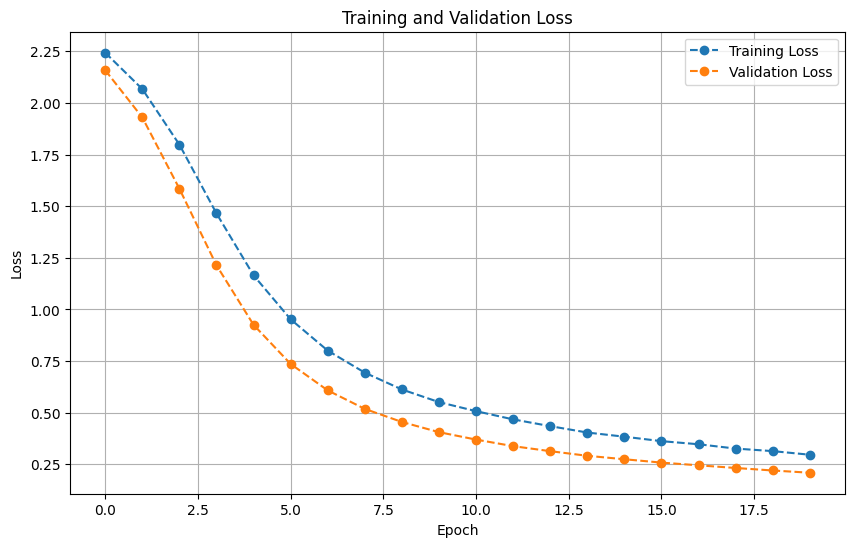

In [7]:
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [8]:

from sklearn.metrics import classification_report

import numpy as np

# Get predictions from the model
y_pred = model.predict(X_test)  # X_test is your test data

# Assuming y_pred is the predicted probabilities, convert them to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the classification report
print(classification_report(y_test, y_pred_classes, digits=2))





438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1419
           1       0.96      0.98      0.97      1607
           2       0.93      0.93      0.93      1403
           3       0.94      0.92      0.93      1437
           4       0.95      0.95      0.95      1326
           5       0.93      0.94      0.93      1249
           6       0.95      0.96      0.96      1351
           7       0.94      0.94      0.94      1488
           8       0.94      0.90      0.92      1319
           9       0.92      0.92      0.92      1401

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



In [24]:
number = y_test[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


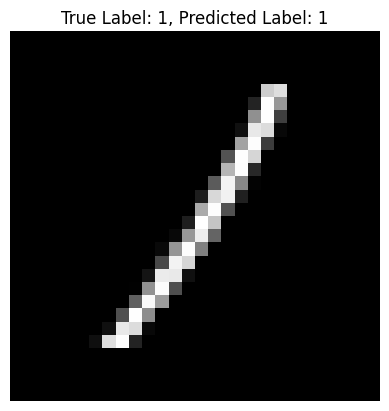

In [9]:
index = 30  # You can change this to test different images
single_image = X_test[index]

# Reshape the image to fit the input shape of the CNN model (batch size of 1, height, width, channels)
single_image_reshaped = single_image.reshape(1, 28, 28, 1)

# Predict the class of the single image
prediction = model.predict(single_image_reshaped)

# Convert the predicted probabilities to a class label
predicted_class = np.argmax(prediction, axis=1)

# Get the true class label
true_class = y_test[index]

# Display the image along with the predicted and true class
plt.imshow(single_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_class}, Predicted Label: {predicted_class[0]}")
plt.axis('off')
plt.show()

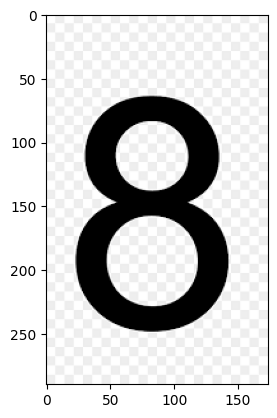

In [16]:
image = cv2.imread("C:/Users/Asus X513/Downloads/downloader.png")

plt.imshow(image)
plt.show()


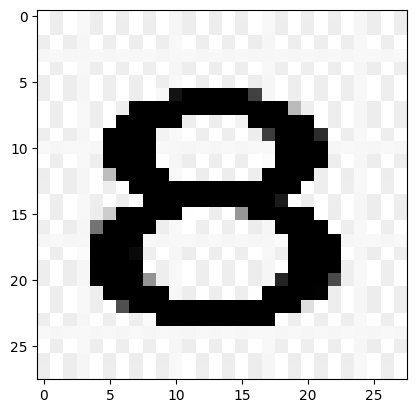

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[7.4537024e-03 4.1547301e-03 7.9984754e-01 1.3338736e-01 5.2475086e-03
  4.1345241e-03 2.7017087e-02 7.5343827e-04 1.7987981e-02 1.6107262e-05]]
Predicted class: 2


In [17]:
# Resize and scale the image
resized_image = tf.image.resize(image, (28, 28))
scaled_image = resized_image / 255

# Convert the RGB image to grayscale
grayscale_image = cv2.cvtColor(np.array(scaled_image), cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.imshow(grayscale_image, cmap='gray')
plt.show()

# Reshape the grayscale image to match the model's expected input shape (1, 28, 28, 1)
grayscale_image = np.expand_dims(grayscale_image, axis=-1)  # (28, 28, 1)
grayscale_image = np.expand_dims(grayscale_image, axis=0)  # Add batch dimension (1, 28, 28, 1)

# Make predictions
y = model.predict(grayscale_image)
print(y)
predicted_class = np.argmax(y, axis=1)[0]

print(f"Predicted class: {predicted_class}")